Referencias:
- https://pandas.pydata.org/
- https://towardsdatascience.com/data-science-with-python-intro-to-loading-and-subsetting-data-with-pandas-9f26895ddd7f

___
# 1. Importando datos

En la carpeta "data" tenemos los archivos "customers_data.csv", "sessions_data.csv", "transactions_data.csv" y "products_data.csv", cada uno de ellos conteniendo información relevante acerca de transacciones de cierta empresa.

El primer paso para comenzar a trabajar con datos es importarlos. Lo podemos hacer con la función `pd.read_csv()`:

In [8]:
# Importar pandas
import pandas as pd

Los **pd.DataFrames** son los objetos por excelencia de pandas para manipular datos. Son eficientes y rápidos. Son la estructura de datos donde pandas carga los diferentes formatos de datos: cuando nuestros datos están limpios y estructurados, cada fila representa una observación, y cada columna una variable o característica. Tanto las filas como las columnas pueden tener etiquetas.

En esta clase vamos a trabajar con datos pertenecientes a ejemplos de la librería featuretools [en esta página](https://github.com/FeatureLabs/featuretools). Sin embargo para entender cómo es que se cargan estos datos, estos están disponibles en la carpeta data en formato CSV.

En esta y la siguiente clase, además de importar datos, aprenderemos a:
- seleccionar subconjuntos de datos;
- filtrar variables por categorías;
- relacionar tablas con datos complementarios;
- entre otros.

Comenzamos:

___
# 1. Importando datos

En la carpeta "data" tenemos los archivos "customers_data.csv", "sessions_data.csv", "transactions_data.csv" y "products_data.csv", cada uno de ellos conteniendo información relevante acerca de transacciones de cierta empresa.

El primer paso para comenzar a trabajar con datos es importarlos. Lo podemos hacer con la función `pd.read_csv()`:

In [14]:
# Importar customers_data.csv
customers = pd.read_csv("../Clases/data/customers_data.csv")
customers

,Unnamed: 0,customer_id,zip_code,join_date,date_of_birth
0,0,1,60091,2011-04-17 10:48:33,1994-07-18
1,1,2,13244,2012-04-15 23:31:04,1986-08-18
2,2,3,13244,2011-08-13 15:42:34,2003-11-21
3,3,4,60091,2011-04-08 20:08:14,2006-08-15
4,4,5,60091,2010-07-17 05:27:50,1984-07-28


Bien, ya tenemos los datos cargados, sin embargo, se ve algo raro. 

¿Qué es esta columna "Unnamed: 0"? (abrir el CSV)

Para especificar que esta columna corresponde al índice, podemos usar el argumento `index_col`.

In [15]:
# Importar customers_data.csv, haciendo uso del argumento index_col
customers = pd.read_csv("data/customers_data.csv",
                        index_col=[0]
                       )
customers

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [16]:
# Tipo de lo que importamos
type(customers)

pandas.core.frame.DataFrame

In [17]:
# Usar el método set_index para indizar por el id de cliente
customers.set_index("customer_id")

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21
4,60091,2011-04-08 20:08:14,2006-08-15
5,60091,2010-07-17 05:27:50,1984-07-28


In [18]:
customers

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


Podemos ver que pandas no convierte **customer_id** en el índice permanente del DataFrame, a menos que se lo especifiquemos. Para especificarlo, debemos usar el argumento `inplace`

In [19]:
# Usar el método set_index para indizar por el id de cliente, usando el argumento inplace
# customers = customers.set_index("customer_id")
customers.set_index("customer_id", inplace=True)
customers

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21
4,60091,2011-04-08 20:08:14,2006-08-15
5,60091,2010-07-17 05:27:50,1984-07-28


___
# 2. Indización y selección de datos

Hay muchas formas de las cuales podemos seleccionar datos de DataFrames. Veremos, de acuerdo al artículo al final de este documento, la forma basada en corchetes ([]) y en los métodos `loc()` y `iloc()`.

Con los corchetes, podemos seleccionar ciertas filas, o bien, ciertas columnas. 

Para una selección de filas, podemos usar el indizado como en las listas: [start_index:end_index:step], recordando que el `end_index` no es inclusivo.

Por ejemplo, seleccionar los clientes en las primeras dos filas:

In [20]:
customers[:2]

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18


In [21]:
# Seleccionar la columna date_of_birth
customers['date_of_birth']

customer_id
1    1994-07-18
2    1986-08-18
3    2003-11-21
4    2006-08-15
5    1984-07-28
Name: date_of_birth, dtype: object

In [22]:
type(customers['date_of_birth'])

pandas.core.series.Series

Las Series de pandas son arreglos unidimensionales que pueden ser etiquetados. En algunos casos, querremos seleccionar solo una columna pero mantener esta selección en un DataFrame. En este caso podemos pasar una lista con un solo elemento:

In [23]:
customers[['date_of_birth']]

,date_of_birth
customer_id,
1,1994-07-18
2,1986-08-18
3,2003-11-21
4,2006-08-15
5,1984-07-28


In [24]:
type(customers[['date_of_birth']])

pandas.core.frame.DataFrame

Finalmente, seleccionamos dos columnas:

In [25]:
customers[['zip_code', 'date_of_birth']]

,zip_code,date_of_birth
customer_id,,
1,60091,1994-07-18
2,13244,1986-08-18
3,13244,2003-11-21
4,60091,2006-08-15
5,60091,1984-07-28


Muy bien, ya vimos que los corchetes son útiles. También existen los poderosos métodos `loc` y `iloc`, que nos dan el poder de seleccionar ambos a la vez: columnas y filas.

¿En qué se diferencian?

- El método `loc` nos permite seleccionar filas y columnas de nuestros datos basados en etiquetas. Primero, se deben especificar las etiquetas de las filas, y luego las de las columnas.

- El método `iloc` nos permite hacer lo mismo pero basado en índices enteros de nuestro DataFrame (como si fueran matrices).

Como antes, si queremos seleccionar todas las filas, o columnas, simplemente escribimos `:` en el lugar adecuado.

Mejor con ejemplos:

Para un mejor entendimiento de esta parte, reetiquetaremos la numeración de clientes con una "numeración" alfabética. Es decir: 1-A, 2-B, ..., 5-E.

In [26]:
customers.reset_index(inplace = True)
customers.index = ['A', 'B' , 'C' , 'D', 'E']
customers.index.name = 'index'

In [27]:
customers

,customer_id,zip_code,join_date,date_of_birth
index,,,,
A,1,60091,2011-04-17 10:48:33,1994-07-18
B,2,13244,2012-04-15 23:31:04,1986-08-18
C,3,13244,2011-08-13 15:42:34,2003-11-21
D,4,60091,2011-04-08 20:08:14,2006-08-15
E,5,60091,2010-07-17 05:27:50,1984-07-28


In [28]:
customers.loc['A']

customer_id                        1
zip_code                       60091
join_date        2011-04-17 10:48:33
date_of_birth             1994-07-18
Name: A, dtype: object

In [29]:
customers.iloc[0]

customer_id                        1
zip_code                       60091
join_date        2011-04-17 10:48:33
date_of_birth             1994-07-18
Name: A, dtype: object

Nos dan series, ¿y si queremos DataFrames?

In [30]:
customers.loc[['A']]

,customer_id,zip_code,join_date,date_of_birth
index,,,,
A,1,60091,2011-04-17 10:48:33,1994-07-18


In [35]:
customers.iloc[[0]]

,customer_id,zip_code,join_date,date_of_birth
index,,,,
A,1,60091,2011-04-17 10:48:33,1994-07-18


In [37]:
customers.loc[['A','C']]

,customer_id,zip_code,join_date,date_of_birth
index,,,,
A,1,60091,2011-04-17 10:48:33,1994-07-18
C,3,13244,2011-08-13 15:42:34,2003-11-21


In [38]:
customers.loc[["B", "E"], ["zip_code", "join_date"]]

,zip_code,join_date
index,,
B,13244,2012-04-15 23:31:04
E,60091,2010-07-17 05:27:50


In [39]:
# iloc
customers.iloc[[1, 4], [1, 2]]

,zip_code,join_date
index,,
B,13244,2012-04-15 23:31:04
E,60091,2010-07-17 05:27:50


In [40]:
customers.iloc[:, [1, 2]]

,zip_code,join_date
index,,
A,60091,2011-04-17 10:48:33
B,13244,2012-04-15 23:31:04
C,13244,2011-08-13 15:42:34
D,60091,2011-04-08 20:08:14
E,60091,2010-07-17 05:27:50


In [41]:
customers

,customer_id,zip_code,join_date,date_of_birth
index,,,,
A,1,60091,2011-04-17 10:48:33,1994-07-18
B,2,13244,2012-04-15 23:31:04,1986-08-18
C,3,13244,2011-08-13 15:42:34,2003-11-21
D,4,60091,2011-04-08 20:08:14,2006-08-15
E,5,60091,2010-07-17 05:27:50,1984-07-28


¿Qué tal? Ya tenemos varias formas de seleccionar e indexar ciertos datos.

Esto es, sin duda, muy útil. Por otra parte, muchas veces queremos obtener cierta información (clientes, en nuestro ejemplo) que cumplan algunos requisitos. Por ejemplo:
- que sean mayores de 18 años, o
- que su antiguedad en la plataforma sea menor a seis meses, o
- que residan en cierta zona,
- entre otros.

Para ello utilizamos los operadores de comparación (==, >, <, >=, <=, !=).

___
# 3. Filtrado de datos

Los operadores de comparación pueden ser utilizados con Series de pandas. 

Esto resulta ser súper útil para filtrar datos con ciertas condiciones específicas (esto lo veremos enseguida). 

Por ahora, veremos que al usar operadores de comparación con Series, el resultado será Series booleanas. Es decir, cada elemento de dichas series será `True` si la condición se satisface, y `Falso` de lo contrario.

Una vez tenemos la serie boolena, podemos aplicarla para la selección de filas, obteniendo un DataFrame filtrado como resultado.

**Ejemplos**

¿Cuáles clientes son mayores de 18 años?

In [42]:
customers['date_of_birth'] <= '2004-02-22'

index
A     True
B     True
C     True
D    False
E     True
Name: date_of_birth, dtype: bool

¿Cuáles clientes se registraron después del primero de Junio del 2011?

In [46]:
customers['join_date'] >= '2011-06-01'

index
A    False
B     True
C     True
D    False
E    False
Name: join_date, dtype: bool

¿Cuáles clientes viven en la zona con CP 13244?

In [45]:
customers['zip_code'] == 13244

index
A    False
B     True
C     True
D    False
E    False
Name: zip_code, dtype: bool

Añadiendo datos

In [58]:
customer_new = pd.DataFrame({'customer_id' : 6,
                             'zip_code' : 45016,
                             'join_date' : "2018-05-01 16:35:54",
                             'date_of_birth': '1980-10-05'}, index = ['F'])
customers = pd.concat((customers, customer_new), axis = 0)

In [59]:
customer_new

,customer_id,zip_code,join_date,date_of_birth
F,6,45016,2018-05-01 16:35:54,1980-10-05


In [60]:
customers

,customer_id,zip_code,join_date,date_of_birth,date_birth
A,1,60091,2011-04-17 10:48:33,1994-07-18,NaN
B,2,13244,2012-04-15 23:31:04,1986-08-18,NaN
C,3,13244,2011-08-13 15:42:34,2003-11-21,NaN
D,4,60091,2011-04-08 20:08:14,2006-08-15,NaN
E,5,60091,2010-07-17 05:27:50,1984-07-28,NaN
F,6,45016,2018-05-01 16:35:34,NaN,1980-10-05
F,6,45016,2018-05-01 16:35:34,NaN,1980-10-05
F,6,45016,2018-05-01 16:35:34,NaN,1980-10-05
F,6,45016,2018-05-01 16:35:54,NaN,1980-10-05
F,6,45016,2018-05-01 16:35:54,NaN,1980-10-05


## 3.1 Filtrado con múltiples condiciones

Cuando queremos filtrar datos con múltiples condiciones, podemos usar operadores booleanos (`and`, `or`, `not`), solo con una pequeña modificación. Usamos:

- `&` en lugar de `and`,
- `|` en lugar de `or`, y
- `~` en lugar de `not`.

In [61]:
customers = pd.read_csv("../Clases/data/customers_data.csv")
customers

,Unnamed: 0,customer_id,zip_code,join_date,date_of_birth
0,0,1,60091,2011-04-17 10:48:33,1994-07-18
1,1,2,13244,2012-04-15 23:31:04,1986-08-18
2,2,3,13244,2011-08-13 15:42:34,2003-11-21
3,3,4,60091,2011-04-08 20:08:14,2006-08-15
4,4,5,60091,2010-07-17 05:27:50,1984-07-28


In [62]:
customers[(customers["date_of_birth"] <= "2004-02-22") &
          (customers["zip_code"] == 13244)]

,Unnamed: 0,customer_id,zip_code,join_date,date_of_birth
1,1,2,13244,2012-04-15 23:31:04,1986-08-18
2,2,3,13244,2011-08-13 15:42:34,2003-11-21


**Ejemplo en slides**

https://www.kaggle.com/abhishekmamidi/precipitation-data-of-pune-from-1965-to-2002

In [87]:
df_lluvias_archivo = pd.read_csv('../Clases/pune_1965_to_2002.csv',
                                index_col=[0]) # Leer el archivo y guardarlo en un DataFrame
df_lluvias_archivo.head(5)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [69]:
df_lluvias_archivo.tail(5)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
33,1998,0.008,2.671,0.073,0.377,15.717,238.609,590.663,362.357,243.444,96.324,52.965,0.035
34,1999,0.000,1.431,0.000,0.642,35.828,415.471,277.137,98.616,225.962,180.300,0.263,0.033
35,2000,0.000,0.170,0.000,1.193,26.237,371.328,265.417,220.814,147.196,38.246,15.274,8.187
36,2001,0.147,0.000,2.178,1.528,7.860,247.982,279.547,189.404,158.025,135.518,23.633,0.003
37,2002,0.231,0.911,0.388,53.266,18.430,509.145,84.936,257.205,78.269,21.486,0.614,0.000


In [83]:
indice = list(df_lluvias_archivo.Year) # Quiero cambiar los índices por el año, entonces descompongo el archivo en su índice, columnas y valores

In [73]:
columnas = df_lluvias_archivo.columns[1:] # La columna original de año ya no es más columna sino índice
columnas

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

In [86]:
valores = df_lluvias_archivo.values[:,1:] 
valores

array([[2.90000e-02, 6.90000e-02, 0.00000e+00, 2.16670e+01, 1.78590e+01,
        1.02111e+02, 6.06071e+02, 4.02521e+02, 6.95110e+01, 5.24900e+00,
        1.62320e+01, 2.20750e+01],
       [9.05000e-01, 0.00000e+00, 0.00000e+00, 2.98100e+00, 6.30080e+01,
        9.40880e+01, 4.81942e+02, 5.93860e+01, 1.50624e+02, 1.30800e+00,
        4.12140e+01, 4.13200e+00],
       [2.48000e-01, 3.39000e+00, 1.32000e+00, 1.34820e+01, 1.11160e+01,
        2.51314e+02, 7.80006e+02, 1.81069e+02, 1.83757e+02, 5.04040e+01,
        8.39300e+00, 3.76850e+01],
       [3.18000e-01, 3.03500e+00, 1.70400e+00, 2.33070e+01, 7.44100e+00,
        1.79872e+02, 3.79354e+02, 1.71979e+02, 2.19884e+02, 7.39970e+01,
        2.33260e+01, 2.02000e+00],
       [2.48000e-01, 2.52400e+00, 3.34000e-01, 4.56900e+00, 6.21300e+00,
        3.93682e+02, 6.78354e+02, 3.97335e+02, 2.05413e+02, 2.40140e+01,
        2.43850e+01, 1.95100e+00],
       [7.00000e-02, 0.00000e+00, 1.00000e-03, 1.62180e+01, 6.80360e+01,
        3.00546e+02, 3

In [76]:
df_lluvias = pd.DataFrame(valores,index=indice,columns=columnas)
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [77]:
df_lluvias.sum(axis=0)

Jan       11.186
Feb       41.843
Mar       63.733
Apr      470.487
May      952.272
Jun    12809.663
Jul    16340.395
Aug    10529.357
Sep     7642.245
Oct     2783.320
Nov      958.492
Dec      230.646
dtype: float64

<AxesSubplot:ylabel='Frequency'>

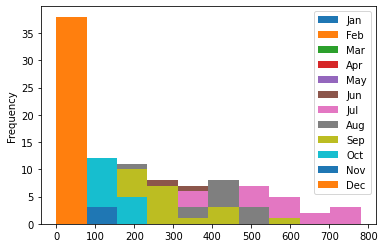

In [78]:
df_lluvias.plot.hist()

In [79]:
print(df_lluvias.mean(axis='columns')) # Promedio de lluvias por año


1965    105.282833
1966     74.965667
1967    126.848667
1968     90.519750
1969    144.918500
1970    106.125583
1971     98.051000
1972     59.206250
1973    130.839417
1974    118.823000
1975    148.153167
1976    161.763917
1977    100.179500
1978     97.381917
1979    147.432250
1980    105.682083
1981    130.230083
1982     78.590583
1983    134.745667
1984    128.246750
1985    101.237667
1986    105.664083
1987     99.833250
1988    151.887417
1989    116.668667
1990    147.191167
1991    124.771333
1992    110.323583
1993    100.854333
1994    165.640750
1995    100.755667
1996    135.944250
1997    153.736667
1998    133.603583
1999    102.973583
2000     91.171833
2001     87.152083
2002     85.406750
dtype: float64


In [80]:
print(df_lluvias.describe()) # Resumen estadístico por mes

             Jan        Feb        Mar        Apr        May         Jun  \
count  38.000000  38.000000  38.000000  38.000000  38.000000   38.000000   
mean    0.294368   1.101132   1.677184  12.381237  25.059789  337.096395   
std     0.640510   1.741219   2.486516  13.671071  22.451708  171.666565   
min     0.000000   0.000000   0.000000   0.061000   0.508000   94.088000   
25%     0.000000   0.000000   0.000000   2.291750   7.005250  226.180250   
50%     0.008000   0.247500   0.596000   5.489500  18.144500  312.100000   
75%     0.248000   1.948500   2.076000  19.796500  33.066000  412.568250   
max     3.013000   8.410000   9.619000  53.266000  80.539000  773.737000   

              Jul         Aug         Sep         Oct         Nov        Dec  
count   38.000000   38.000000   38.000000   38.000000   38.000000  38.000000  
mean   430.010395  277.088342  201.111711   73.245263   25.223474   6.069632  
std    177.976444  132.245356  123.736320   62.936775   31.806180  11.725716  

In [81]:
print(df_lluvias.T.describe()) # Resumen estadístico por año

             1965        1966        1967        1968        1969        1970  \
count   12.000000   12.000000   12.000000   12.000000   12.000000   12.000000   
mean   105.282833   74.965667  126.848667   90.519750  144.918500  106.125583   
std    193.803249  136.712641  223.481438  121.542279  226.523917  130.810410   
min      0.000000    0.000000    0.248000    0.318000    0.248000    0.000000   
25%      3.954000    1.207250    7.142250    2.781250    2.380750    0.052750   
50%     19.763000   22.673000   25.583500   23.316500   15.113500   42.127000   
75%     77.661000   70.778000  181.741000  173.952250  252.480250  189.849000   
max    606.071000  481.942000  780.006000  379.354000  678.354000  330.502000   

             1971        1972        1973        1974  ...        1993  \
count   12.000000   12.000000   12.000000   12.000000  ...   12.000000   
mean    98.051000   59.206250  130.839417  118.823000  ...  100.854333   
std    139.314988  100.112325  209.317999  148.0

___
# Operaciones sobres Strings

 Descargue el archivo de presidentes en el siguiente enlace
 https://www.kaggle.com/harshitagpt/us-presidents

In [89]:
Presidentes_archivo = pd.read_csv('../Clases/us_presidents 2.csv')

In [91]:
Presidentes_archivo.head(5)

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [93]:
Presidentes_archivo[['president']]

,president
0,George Washington
1,John Adams
2,Thomas Jefferson
3,James Madison
4,James Monroe
5,John Quincy Adams
6,Andrew Jackson
7,Martin Van Buren
8,William Henry Harrison
9,John Tyler


In [94]:
Presidentes_nombres = pd.Series(Presidentes_archivo['president'])

In [96]:
print(Presidentes_nombres) # Nombres de todos los presidentes de EEUU

0          George Washington
1                 John Adams
2           Thomas Jefferson
3              James Madison
4               James Monroe
5          John Quincy Adams
6             Andrew Jackson
7           Martin Van Buren
8     William Henry Harrison
9                 John Tyler
10             James K. Polk
11            Zachary Taylor
12          Millard Fillmore
13           Franklin Pierce
14            James Buchanan
15           Abraham Lincoln
16            Andrew Johnson
17          Ulysses S. Grant
18       Rutherford B. Hayes
19         James A. Garfield
20         Chester A. Arthur
21          Grover Cleveland
22         Benjamin Harrison
23          Grover Cleveland
24          William McKinley
25        Theodore Roosevelt
26       William Howard Taft
27            Woodrow Wilson
28         Warren G. Harding
29           Calvin Coolidge
30            Herbert Hoover
31     Franklin D. Roosevelt
32           Harry S. Truman
33      Dwight D. Eisenhower
34           J

In [97]:
print(Presidentes_nombres.str.upper()) # Todos los nombres en mayúsculas

0          GEORGE WASHINGTON
1                 JOHN ADAMS
2           THOMAS JEFFERSON
3              JAMES MADISON
4               JAMES MONROE
5          JOHN QUINCY ADAMS
6             ANDREW JACKSON
7           MARTIN VAN BUREN
8     WILLIAM HENRY HARRISON
9                 JOHN TYLER
10             JAMES K. POLK
11            ZACHARY TAYLOR
12          MILLARD FILLMORE
13           FRANKLIN PIERCE
14            JAMES BUCHANAN
15           ABRAHAM LINCOLN
16            ANDREW JOHNSON
17          ULYSSES S. GRANT
18       RUTHERFORD B. HAYES
19         JAMES A. GARFIELD
20         CHESTER A. ARTHUR
21          GROVER CLEVELAND
22         BENJAMIN HARRISON
23          GROVER CLEVELAND
24          WILLIAM MCKINLEY
25        THEODORE ROOSEVELT
26       WILLIAM HOWARD TAFT
27            WOODROW WILSON
28         WARREN G. HARDING
29           CALVIN COOLIDGE
30            HERBERT HOOVER
31     FRANKLIN D. ROOSEVELT
32           HARRY S. TRUMAN
33      DWIGHT D. EISENHOWER
34           J

In [98]:
print(Presidentes_nombres.str.len()) # Longitud de cada nombre, incluyendo puntos y espacios

0     17
1     10
2     16
3     13
4     12
5     17
6     14
7     16
8     22
9     10
10    13
11    14
12    16
13    15
14    14
15    15
16    14
17    16
18    19
19    17
20    17
21    16
22    17
23    16
24    16
25    18
26    19
27    14
28    17
29    15
30    14
31    21
32    15
33    20
34    15
35    17
36    13
37    11
38    12
39    13
40    17
41    12
42    14
43    12
44    12
Name: president, dtype: int64


In [99]:
print(Presidentes_nombres.str.startswith('J')) # ¿Qué nombres completos tienen "J" como primera letra?

0     False
1      True
2     False
3      True
4      True
5      True
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34     True
35    False
36    False
37    False
38     True
39    False
40    False
41    False
42    False
43    False
44    False
Name: president, dtype: bool


In [100]:
print(Presidentes_nombres.str.split()) # Separar cada texto por espacios. Ojo, presidentes con segundo nombre generan tres strings.

0           [George, Washington]
1                  [John, Adams]
2            [Thomas, Jefferson]
3               [James, Madison]
4                [James, Monroe]
5          [John, Quincy, Adams]
6              [Andrew, Jackson]
7           [Martin, Van, Buren]
8     [William, Henry, Harrison]
9                  [John, Tyler]
10             [James, K., Polk]
11             [Zachary, Taylor]
12           [Millard, Fillmore]
13            [Franklin, Pierce]
14             [James, Buchanan]
15            [Abraham, Lincoln]
16             [Andrew, Johnson]
17          [Ulysses, S., Grant]
18       [Rutherford, B., Hayes]
19         [James, A., Garfield]
20         [Chester, A., Arthur]
21           [Grover, Cleveland]
22          [Benjamin, Harrison]
23           [Grover, Cleveland]
24           [William, McKinley]
25         [Theodore, Roosevelt]
26       [William, Howard, Taft]
27             [Woodrow, Wilson]
28         [Warren, G., Harding]
29            [Calvin, Coolidge]
30        

In [120]:
Presidentes_archivo['president'].str.startswith('J')

0     False
1      True
2     False
3      True
4      True
5      True
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34     True
35    False
36    False
37    False
38     True
39    False
40    False
41    False
42    False
43    False
44    False
Name: president, dtype: bool

In [121]:
Presidentes_archivo[Presidentes_archivo['president'].str.startswith('J')]

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins
5,5,6,"March 4, 1825","March 4, 1829",John Quincy Adams,8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun
9,9,10,"April 4, 1841","March 4, 1845",John Tyler,10th Vice President of the United States,"Whig April 4, 1841 – September 13, 1841",Office vacant
10,10,11,"March 4, 1845","March 4, 1849",James K. Polk,9th Governor of Tennessee (1839–1841),Democratic,George M. Dallas
14,14,15,"March 4, 1857","March 4, 1861",James Buchanan,United States Minister to the Court of St J...,Democratic,John C. Breckinridge
19,19,20,"March 4, 1881","September 19, 1881",James A. Garfield,U.S. Representative for Ohio's 19th District...,Republican,Chester A. Arthur
34,34,35,"January 20, 1961","November 22, 1963",John F. Kennedy,U.S. Senator ( Class 1 ) from Massachuset...,Democratic,Lyndon B. Johnson
38,38,39,"January 20, 1977","January 20, 1981",Jimmy Carter,76th Governor of Georgia (1971–1975),Democratic,Walter Mondale


#  Formato de fechas y horas

Lo primero que se tiene que hacer para un correcto manejo de las fechas (y horas) es identificar las columnas o variables que contienen fechas. Por ejemplo, de la tabla `transactions`:

In [122]:
# Cargar transactions_data
transactions = pd.read_csv("data/transactions_data.csv", index_col=0)
transactions.head()

,transaction_id,session_id,transaction_time,product_id,amount
0,298,1,2014-01-01 00:00:00,5,127.64
1,2,1,2014-01-01 00:01:05,2,109.48
2,308,1,2014-01-01 00:02:10,3,95.06
3,116,1,2014-01-01 00:03:15,4,78.92
4,371,1,2014-01-01 00:04:20,3,31.54


In [123]:
transactions["transaction_time"]

0      2014-01-01 00:00:00
1      2014-01-01 00:01:05
2      2014-01-01 00:02:10
3      2014-01-01 00:03:15
4      2014-01-01 00:04:20
              ...         
495    2014-01-01 08:56:15
496    2014-01-01 08:57:20
497    2014-01-01 08:58:25
498    2014-01-01 08:59:30
499    2014-01-01 09:00:35
Name: transaction_time, Length: 500, dtype: object

Lo que sigue, es especificarle a pandas el formato en que vienen esas fechas con la función `to_datetime()` de pandas

In [124]:
transactions.dtypes

transaction_id        int64
session_id            int64
transaction_time     object
product_id            int64
amount              float64
dtype: object

In [125]:
# Cargar sessions_data
sessions = pd.read_csv("data/sessions_data.csv", index_col=0)
sessions.head()

,session_id,customer_id,device,session_start
0,1,2,desktop,2014-01-01 00:00:00
1,2,5,mobile,2014-01-01 00:17:20
2,3,4,mobile,2014-01-01 00:28:10
3,4,1,mobile,2014-01-01 00:44:25
4,5,4,mobile,2014-01-01 01:11:30


In [126]:
sessions.dtypes

session_id        int64
customer_id       int64
device           object
session_start    object
dtype: object

In [128]:
# Especificar el formato de fechas en la tabla sessions
sessions["session_start"] = pd.to_datetime(sessions["session_start"],
                                           format="%Y-%m-%d %H:%M:%S",
                                           errors="coerce")

In [130]:
sessions.dtypes

session_id                int64
customer_id               int64
device                   object
session_start    datetime64[ns]
dtype: object

In [143]:
customers["join_date"]

0   2011-04-17 10:48:33
1   2012-04-15 23:31:04
2   2011-08-13 15:42:34
3   2011-04-08 20:08:14
4   2010-07-17 05:27:50
Name: join_date, dtype: datetime64[ns]

In [132]:
customers["date_of_birth"]

0    1994-07-18
1    1986-08-18
2    2003-11-21
3    2006-08-15
4    1984-07-28
Name: date_of_birth, dtype: object

In [133]:
# Especificar el formato de fechas en la tabla customers
customers["join_date"] = pd.to_datetime(customers["join_date"],
                                        format="%Y-%m-%d %H:%M:%S",
                                        errors="coerce")
customers["date_of_birth"] = pd.to_datetime(customers["date_of_birth"],
                                            format="%Y-%m-%d",
                                            errors="coerce")

In [134]:
customers["date_of_birth"]

0   1994-07-18
1   1986-08-18
2   2003-11-21
3   2006-08-15
4   1984-07-28
Name: date_of_birth, dtype: datetime64[ns]

Contenido de slide

In [135]:
fecha = pd.to_datetime('03/01/2020',dayfirst=True) # Definiendo una fecha a partir de un texto. Si omitimos dayfirst, la fecha por defecto es mes/día/año
print(fecha)

2020-01-03 00:00:00


In [136]:
fechas_1 = pd.date_range(start= fecha, end= pd.to_datetime('10/01/2020',dayfirst=True))
print(fechas_1) # Días desde el 3 de enero de 2020 hasta el 10 de enero de 2020


DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')


In [137]:
fechas_2 = pd.date_range(start= fecha, periods= 8) # Equivalente al anterior. Los períodos por defecto se cuentan en días, pueden cambiarse.
print(fechas_2)


DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')


In [138]:
fechas_3 = pd.date_range(start= fecha, periods= 8,freq='M') # Aquí se cuentan 8 períodos en meses, marcando como día el último de cada período.
print(fechas_3)


DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31'],
              dtype='datetime64[ns]', freq='M')


In [139]:
mes_inicio = fecha.strftime('%Y-%m')
print(mes_inicio)


2020-01


In [140]:
fechas_4 = pd.period_range(start= mes_inicio,periods= 8,freq='M') # Generar 8 meses consecutivos a partir de mes_inicio
print(fechas_4)


PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08'],
            dtype='period[M]')


In [141]:
cuanto_tiempo = fechas_3[7] - fechas_3[0] # ¿Cuánto tiempo pasó desde el primer período hasta el último? Esto es un objeto Timedelta
print(cuanto_tiempo)


213 days 00:00:00


In [142]:
cuanto_tiempo_meses = fechas_3[7].to_period('M') - fechas_3[0].to_period('M') # Lo mismo pero en meses. Hay que pasar cada término a meses
print(cuanto_tiempo_meses)

<7 * MonthEnds>


In [144]:
fechas_presidentes_orig = Presidentes_archivo['start'] # Extraigo fechas de inicio de período presidencial
print(fechas_presidentes_orig)


0         April 30, 1789
1          March 4, 1797
2          March 4, 1801
3          March 4, 1809
4          March 4, 1817
5          March 4, 1825
6          March 4, 1829
7          March 4, 1837
8          March 4, 1841
9          April 4, 1841
10         March 4, 1845
11         March 4, 1849
12          July 9, 1850
13         March 4, 1853
14         March 4, 1857
15         March 4, 1861
16        April 15, 1865
17         March 4, 1869
18         March 4, 1877
19         March 4, 1881
20    September 19, 1881
21         March 4, 1885
22         March 4, 1889
23         March 4, 1893
24         March 4, 1897
25    September 14, 1901
26         March 4, 1909
27         March 4, 1913
28         March 4, 1921
29        August 2, 1923
30         March 4, 1929
31         March 4, 1933
32        April 12, 1945
33      January 20, 1953
34      January 20, 1961
35     November 22, 1963
36      January 20, 1969
37        August 9, 1974
38      January 20, 1977
39      January 20, 1981


In [145]:
print(type(fechas_presidentes_orig)) # Estas fechas son objetos Series. Necesito transformarlos en índices


<class 'pandas.core.series.Series'>


In [146]:
fechas_presidentes = pd.DatetimeIndex(fechas_presidentes_orig) # Transformo Series en índices
print(fechas_presidentes)


DatetimeIndex(['1789-04-30', '1797-03-04', '1801-03-04', '1809-03-04',
               '1817-03-04', '1825-03-04', '1829-03-04', '1837-03-04',
               '1841-03-04', '1841-04-04', '1845-03-04', '1849-03-04',
               '1850-07-09', '1853-03-04', '1857-03-04', '1861-03-04',
               '1865-04-15', '1869-03-04', '1877-03-04', '1881-03-04',
               '1881-09-19', '1885-03-04', '1889-03-04', '1893-03-04',
               '1897-03-04', '1901-09-14', '1909-03-04', '1913-03-04',
               '1921-03-04', '1923-08-02', '1929-03-04', '1933-03-04',
               '1945-04-12', '1953-01-20', '1961-01-20', '1963-11-22',
               '1969-01-20', '1974-08-09', '1977-01-20', '1981-01-20',
               '1989-01-20', '1993-01-20', '2001-01-20', '2009-01-20',
               '2017-01-20'],
              dtype='datetime64[ns]', name='start', freq=None)


In [147]:
Serie_presidentes = pd.Series(Presidentes_nombres.values,index=fechas_presidentes) # Creo un objeto Series con los nombres y las fechas de los presidentes
print(Serie_presidentes)

start
1789-04-30         George Washington
1797-03-04                John Adams
1801-03-04          Thomas Jefferson
1809-03-04             James Madison
1817-03-04              James Monroe
1825-03-04         John Quincy Adams
1829-03-04            Andrew Jackson
1837-03-04          Martin Van Buren
1841-03-04    William Henry Harrison
1841-04-04                John Tyler
1845-03-04             James K. Polk
1849-03-04            Zachary Taylor
1850-07-09          Millard Fillmore
1853-03-04           Franklin Pierce
1857-03-04            James Buchanan
1861-03-04           Abraham Lincoln
1865-04-15            Andrew Johnson
1869-03-04          Ulysses S. Grant
1877-03-04       Rutherford B. Hayes
1881-03-04         James A. Garfield
1881-09-19         Chester A. Arthur
1885-03-04          Grover Cleveland
1889-03-04         Benjamin Harrison
1893-03-04          Grover Cleveland
1897-03-04          William McKinley
1901-09-14        Theodore Roosevelt
1909-03-04       William Howard 

In [148]:
Serie_presidentes['1850':'1901'] # ¿Qué presidentes gobernaron entre 1850 y 1901 inclusive? Muy útil

start
1850-07-09       Millard Fillmore
1853-03-04        Franklin Pierce
1857-03-04         James Buchanan
1861-03-04        Abraham Lincoln
1865-04-15         Andrew Johnson
1869-03-04       Ulysses S. Grant
1877-03-04    Rutherford B. Hayes
1881-03-04      James A. Garfield
1881-09-19      Chester A. Arthur
1885-03-04       Grover Cleveland
1889-03-04      Benjamin Harrison
1893-03-04       Grover Cleveland
1897-03-04       William McKinley
1901-09-14     Theodore Roosevelt
dtype: object